In [ ]:
import numpy as np
import platform

from Engine.global_clock import GlobalClock, Agent

def my_print(*args):
    if platform.system() == 'Windows':
        print(*args)

In [ ]:
class TimedAgent(Agent):
    def __init__(self, update_rate, start_time):
        super().__init__(update_rate, start_time)
    
    def test_print(self, time):
        if super().check_time(time):
            my_print('A-ha! It is now {time}'.format(time = time))

In [ ]:
GC = GlobalClock(1/30, 2, start=0)
TA1 = TimedAgent(10, 0)

while GC.time <= 5:
    TA1.test_print(GC.time)
    GC.update()

In [ ]:
TA1.check_time(0)

In [ ]:
TA1.next_update_time

In [ ]:
import numpy as np
import pandas as pd

test = np.empty(3)
test[:] = np.NaN
test

In [ ]:
np.array([None, 1])==None

In [ ]:
class FlightPlan(object):
    def __init__(self,
                 leg_num,
                 leg_spd,
                 mode,
                 wpt_start, wpt_start_time,
                 wpt_end, wpt_end_time):
        self.plan = pd.DataFrame({'Leg No.':leg_num, 'Target Speed':leg_spd, 'Mode':mode, 
                                  'Starting Wpt':wpt_start, 'EDT':wpt_start_time, 
                                  'Ending Wpt':wpt_end, 'ETA':wpt_end_time})
        
# testplan = FlightPlan([1,2,3,4], [5,5,5,5], ['Direct', 'Direct', 'Direct', 'Direct'], 
#                      [[0,10,0],[50,0,0],[50,50,0],[70,70,20]],[np.NaN, np.NaN, np.NaN, np.NaN],
#                      [[50,0,0],[50,50,0],[70,70,20],[0,0,0]],[np.NaN, np.NaN, np.NaN, np.NaN] )

testplan = FlightPlan([1,2], [0, 0], ['Hover','Hover'], 
                     [[10,0,0],[10,0,0]],[0, 20],
                     [[10,0,0],[10,0,0]],[20, 40])

testplan.plan

In [ ]:
interval = 0.001

class PID_test(object):
    def __init__(self, PID):
        self.p = PID[0]
        self.i = PID[1]
        self.d = PID[2]
        self.p_err = 0
        self.i_err = 0
        self.d_err = 0
        self.err = 0
        self.interval = interval
    def calc_pseudo_f(self, err):
        self.i_err += err
        self.d_err = (err - self.err)/interval
        self.err = err
        return self.p * err + self.i * self.i_err + self.d_err * self.d
    
num = 100000

x_pos = 10
x_dot = 0
time = 0

x_list = [x_pos]
x_dot_list = [x_dot]
time_list = [time]

x_pos_tgt = 0
x_spd_tgt = 10

# Hover controller
# controller = PID_test([1, 0, 0.8])
# Speed controller
controller = PID_test([1, 0, 0.8])

for i in range(num):
    # error = -(x_pos - x_pos_tgt)
    error = -(x_dot - x_spd_tgt)
    accel = controller.calc_pseudo_f(error)
    x_pos += interval * x_dot
    x_dot += accel * interval
    time += interval
    
    x_list.append(x_pos)
    x_dot_list.append(x_dot)
    time_list.append(time)

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=2, figsize=(12,6))

ax[0].plot(time_list, x_list)
ax[0].set_title('Position trace')

ax[1].plot(time_list, x_dot_list)
ax[1].set_title('Velocity trace')

In [ ]:
import pandas as pd

df = pd.DataFrame({'a':[1 ,2], 'b':[3, 4]})
df.iloc[0]['a']

In [ ]:
from math import comb

numerator = comb(57, 20) * comb(37, 20) * 3

denominator = comb(60, 20) * comb(40, 20)

print(numerator/denominator)

In [ ]:
comb(3,3)

In [ ]:
def calculator(k):
    numerator = comb(k*3-3, k) * comb(k*2-3, k) * 3
    denominator = comb(k*3, k) * comb(k*2, k)
    return numerator/denominator

calculator(20)

In [ ]:
import matplotlib.pyplot as plt

k = 10
ks = []
prob = []
zh_theoretical = 1/9
zh_th = []
for i in range(1000):
    ks.append(k)
    prob.append(calculator(k))
    zh_th.append(zh_theoretical)
    k += 1

fig, ax = plt.subplots()
ax.scatter(ks, prob, label='KC exact answer')
ax.plot(ks, zh_th, '--', label = 'ZH theoretical value')
ax.legend()

plt.show()

In [ ]:
class state(object):
    def __init__(self):
        self.cat = 1
        # self.trajectory = []
    def return_dict(self):
        return self.__dict__ 
    def update(self):
        self.trajectory.append(self.return_dict().copy())

cat = state()

cat.return_dict()

In [ ]:
df.copy()

In [ ]:
a = [0, 1]
df = pd.DataFrame({'a':a})
df

In [ ]:
a[0] = 1
a

In [ ]:
df

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def lambda_calculator(A, B, C):
    """Calculates lambda parameter given 3 points.
    A --> Starting wpt
    B --> Ending wpt
    C --> Aircraft position"""
    CA = C-A
    BA = B-A
    l = np.dot(CA, BA)/np.dot(BA, BA)
    return l

def line_generator(A, B):
    BA = B - A
    return lambda x: A + x*BA

In [2]:
point_a = np.array([0,0,0])
point_b = np.array([2,2,0])
point_c = np.array([-3,1,0])

points_list = [point_a, point_b]

gen_AB = line_generator(point_a, point_b)
# gen_AB(1)

lambda_param = lambda_calculator(point_a, point_b, point_c)
lambda_point = gen_AB(lambda_param)

points_list2 = [lambda_point, point_c]

gen_CL = line_generator(point_c, lambda_point)
               
xyz = np.array([])
xyz2 = np.array([])
genlist = np.arange(0.05, 1, 0.05)
for ds in genlist:
    xyz = np.append(xyz, gen_AB(ds))
    xyz2 = np.append(xyz2, gen_CL(ds))

xyz = xyz.reshape(len(genlist), 3)
xyz2 = xyz2.reshape(len(genlist), 3)

In [3]:
# xyz = np.array([])
# xyz = np.append(xyz, point_a)
# xyz = np.append(xyz, point_a)
# xyz = np.append(xyz, point_b)
# xyz = np.append(xyz, point_b)
# xyz = xyz.reshape(4, 3)

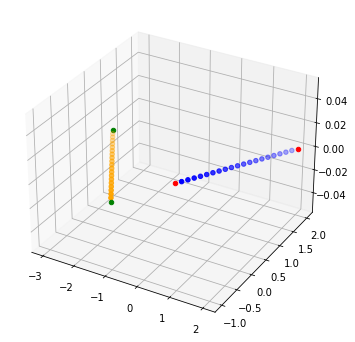

In [4]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')


ax.scatter(xyz[:,0], 
           xyz[:,1], 
           xyz[:,2], c='b')

ax.scatter(xyz2[:,0], 
           xyz2[:,1], 
           xyz2[:,2], c='orange')

for wpt in points_list:
    xx, yy, zz = wpt
    ax.scatter(xx, yy, zz, c='r')
    
for wpt in points_list2:
    xx, yy, zz = wpt
    ax.scatter(xx, yy, zz, c='g')

In [9]:
CL = point_c - lambda_point
BA = point_b - point_a

print('CL dot BA: ', round(np.dot(CL, BA), 6))
print(lambda_point.round(decimals=4))
print('Lambda param: {lambda_p}'.format(lambda_p = round(lambda_param, 4)))

CL dot BA:  0.0
[-1. -1.  0.]
Lambda param: -0.5


In [10]:
class PseudoForceCalculator(object):
    """Calculates a pseudo-force/acceleration in transformed coordinates corresponding,
    similar to Frenet-Serret frame. This "force" will then be transformed back into the body-frame. """

    def __init__(self, p, i, d, interval):
        self.p = p
        self.i = i
        self.d = d
        self.interval = interval
        self.err = np.zeros(3)
        self.d_err = np.zeros(3)
        self.i_err = np.zeros(3)

    def calculate(self, err, d_err=None):
        self.i_err += err
        self.d_err = (err - self.err) / self.interval
        self.err = err
        if d_err is None:
            return -(self.p * self.err + self.i * self.i_err + self.d * self.d_err)
        else:
            return -(self.p * self.err + self.i * self.i_err + self.d * d_err)

    def reset_i_err(self):
        self.i_err = 0
        
        
pid_P2P_vertical = np.array([0.5, 0, 2])
P2P_vertical_pseudo_calculator = PseudoForceCalculator(pid_P2P_vertical[0],
                                                       pid_P2P_vertical[1],
                                                       pid_P2P_vertical[2],
                                                       0.01)

In [11]:
P2P_vertical_pseudo_calculator.calculate(0, 0)

array([-0., -0., -0.])

In [15]:
isinstance(pid_P2P_vertical, type(None))

False